In [53]:
# imports
import pandas as pd
import numpy as np
import plotly.express as px
import category_encoders as ce
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split

In [54]:
#Loading the data. This is a dataset of a survey of Latino adults we conducted at work earlier in the year. 
df = pd.read_csv("/Users/anagonzalezb/Documents/Data Science/2021 NSL for data science.csv")
#Looking into the headers of the data
df.head()

,qkey,SATIS_W86,PERSFIN_W86,SELFNAT_W86,AFROLATINO_W86,POL1JB_W86,HISPSIT_W86,RACESURV56_W86,SKINCLR_W86,F_RACECMB,F_GENDER,F_PARTYSUM_FINAL,F_EDUCCAT3,PRIMARY_LANGUAGE_W86,immgen,discrimlv
0,124,2.0,3.0,2.0,2.0,1.0,3.0,2.0,4.0,1.0,1.0,2,1.0,1,3.0,5.0
1,128,1.0,1.0,2.0,2.0,1.0,2.0,2.0,3.0,5.0,1.0,2,1.0,1,3.0,0.0
2,129,2.0,2.0,4.0,2.0,1.0,3.0,2.0,2.0,1.0,2.0,2,1.0,2,1.0,6.0
3,142,2.0,3.0,2.0,2.0,1.0,3.0,2.0,4.0,1.0,2.0,2,2.0,1,2.0,0.0
4,144,2.0,2.0,2.0,2.0,2.0,3.0,2.0,3.0,5.0,1.0,1,1.0,3,2.0,0.0


In [55]:
#Looking at the types of variables in the dataset. 
##They are all numeric values, and most variables seem to have null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3375 entries, 0 to 3374
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   qkey                  3375 non-null   int64  
 1   SATIS_W86             3342 non-null   float64
 2   PERSFIN_W86           3358 non-null   float64
 3   SELFNAT_W86           3230 non-null   float64
 4   AFROLATINO_W86        3354 non-null   float64
 5   POL1JB_W86            3276 non-null   float64
 6   HISPSIT_W86           3352 non-null   float64
 7   RACESURV56_W86        3348 non-null   float64
 8   SKINCLR_W86           3231 non-null   float64
 9   F_RACECMB             3214 non-null   float64
 10  F_GENDER              3360 non-null   float64
 11  F_PARTYSUM_FINAL      3375 non-null   int64  
 12  F_EDUCCAT3            3373 non-null   float64
 13  PRIMARY_LANGUAGE_W86  3375 non-null   int64  
 14  immgen                3230 non-null   float64
 15  discrimlv            

In [56]:
#Checking if there are any missing values: confirming most variables have missing values. 
#I will leave them as is as missing values here are for non-response
#Not checing for duplicates as I know the dataset and know there are no duplicate cases

df.isnull().sum(axis = 0)

qkey                      0
SATIS_W86                33
PERSFIN_W86              17
SELFNAT_W86             145
AFROLATINO_W86           21
POL1JB_W86               99
HISPSIT_W86              23
RACESURV56_W86           27
SKINCLR_W86             144
F_RACECMB               161
F_GENDER                 15
F_PARTYSUM_FINAL          0
F_EDUCCAT3                2
PRIMARY_LANGUAGE_W86      0
immgen                  145
discrimlv                63
dtype: int64

In [57]:
#Running some basic descriptive statistics to take a look at the variables
df.describe()

,qkey,SATIS_W86,PERSFIN_W86,SELFNAT_W86,AFROLATINO_W86,POL1JB_W86,HISPSIT_W86,RACESURV56_W86,SKINCLR_W86,F_RACECMB,F_GENDER,F_PARTYSUM_FINAL,F_EDUCCAT3,PRIMARY_LANGUAGE_W86,immgen,discrimlv
count,3.375000e+03,3342.000000,3358.000000,3230.000000,3354.000000,3276.000000,3352.000000,3348.000000,3231.000000,3214.000000,3360.000000,3375.000000,3373.000000,3375.000000,3230.000000,3312.000000
mean,1.061579e+11,1.458408,2.597975,2.681424,1.902206,1.231074,2.267303,2.250000,2.923553,2.246111,1.601488,2.187259,1.490661,1.970667,2.267802,1.781401
std,1.008040e+11,0.498342,0.779019,0.952769,0.297080,0.421584,0.818777,1.518903,1.545804,1.764392,0.503454,1.820131,0.709400,0.757123,6.804516,2.316131
min,1.240000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,3.331500e+03,1.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
50%,2.015017e+11,1.000000,3.000000,2.000000,2.000000,1.000000,3.000000,2.000000,3.000000,1.000000,2.000000,2.000000,1.000000,2.000000,2.000000,1.000000
75%,2.019010e+11,2.000000,3.000000,3.000000,2.000000,1.000000,3.000000,2.000000,4.000000,4.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000
max,2.020010e+11,2.000000,4.000000,5.000000,2.000000,2.000000,3.000000,8.000000,10.000000,5.000000,3.000000,9.000000,3.000000,3.000000,98.000000,8.000000


In [58]:
#Running a spearman correlation with Levels of Discrimination experiences. 
#There seeems to be a bit of a correlation between discrimlv and race, skin color, personal finances and street race
#But none of the variables seems to have a very high correlation
df.corr(method='spearman')[['discrimlv']].sort_values(by = 'discrimlv')

,discrimlv
HISPSIT_W86,-0.080893
AFROLATINO_W86,-0.080428
POL1JB_W86,-0.077328
SELFNAT_W86,-0.025580
F_EDUCCAT3,-0.018055
immgen,-0.013070
SATIS_W86,-0.009168
PRIMARY_LANGUAGE_W86,0.047828
F_GENDER,0.048816
qkey,0.064131


In [21]:
#Plotting the data to see if there are any visual patterns

#Levels of discrimination seem higher for those who say they are Afro-Latino (==1)
grouping = df.groupby('AFROLATINO_W86')['discrimlv'].mean()

plot =  px.line(grouping)
plot

In [22]:
#Levels of discrimination seem higher for those who say they are Satisfied with the direction of the country (==1)

grouping = df.groupby('SATIS_W86')['discrimlv'].mean()

plot =  px.line(grouping)
plot

In [23]:
#Levels of discrimination seem higher for those who say their finances are not too well or poorly (>=3)

grouping = df.groupby('PERSFIN_W86')['discrimlv'].mean()

plot =  px.line(grouping)
plot

In [24]:
#Levels of discrimination seem higher for those who say they were born in Puerto Rico (==1)

grouping = df.groupby('SELFNAT_W86')['discrimlv'].mean()

plot =  px.line(grouping)
plot

In [25]:
#Levels of discrimination seem higher for those who approve of the job Biden is doing (==1)

grouping = df.groupby('POL1JB_W86')['discrimlv'].mean()

plot =  px.line(grouping)
plot

In [26]:
#Levels of discrimination seem higher for those who say the situation of Latinos is worse (==2)

grouping = df.groupby('HISPSIT_W86')['discrimlv'].mean()

plot =  px.line(grouping)
plot

In [27]:
#Levels of discrimination seem higher for those who say are seen as Hispanic (==2), Black (==3), Asian (==4), Native American (==5), Multiracial(==7) or some other race (==8)

grouping = df.groupby('RACESURV56_W86')['discrimlv'].mean()

plot =  px.line(grouping)
plot

In [28]:
#Levels of discrimination seem higher for those who say their skin color is darker (>=4)

grouping = df.groupby('SKINCLR_W86')['discrimlv'].mean()

plot =  px.line(grouping)
plot

In [29]:
#Levels of discrimination seem higher for those who say their race is something other than white (>1)

grouping = df.groupby('F_RACECMB')['discrimlv'].mean()

plot =  px.line(grouping)
plot

In [30]:
#Levels of discrimination seem sligthly higher for women (==2) and remarkably higher for people who identify their gender as other (==3)

grouping = df.groupby('F_GENDER')['discrimlv'].mean()

plot =  px.line(grouping)
plot

In [31]:
#Levels of discrimination seem higher for those who identify as Democrats (==2)

grouping = df.groupby('F_PARTYSUM_FINAL')['discrimlv'].mean()

plot =  px.line(grouping)
plot

In [32]:
#Levels of discrimination seem higher for those with lower educational levels (<=2)

grouping = df.groupby('F_EDUCCAT3')['discrimlv'].mean()

plot =  px.line(grouping)
plot

In [33]:
#Levels of discrimination seem higher for those who are bilingual (==3) or speak Spanish predominantely (==4)

grouping = df.groupby('PRIMARY_LANGUAGE_W86')['discrimlv'].mean()

plot =  px.line(grouping)
plot

In [34]:
#Levels of discrimination seem higher for those who are in the second generation (children of immigrants==2) or immigrants themselves (1)

grouping = df.groupby('immgen')['discrimlv'].mean()

plot =  px.line(grouping)
plot

In [68]:
#Replacing missing values with 99 to avoid trouble with the GradientBoosting model
df.replace(np.NaN, 99, inplace=True)

In [60]:
df.isnull().sum(axis = 0)

qkey                    0
SATIS_W86               0
PERSFIN_W86             0
SELFNAT_W86             0
AFROLATINO_W86          0
POL1JB_W86              0
HISPSIT_W86             0
RACESURV56_W86          0
SKINCLR_W86             0
F_RACECMB               0
F_GENDER                0
F_PARTYSUM_FINAL        0
F_EDUCCAT3              0
PRIMARY_LANGUAGE_W86    0
immgen                  0
discrimlv               0
dtype: int64

In [71]:
#Not encoding or using a pipe as we don't have categorical data in the data set. 
#But using Gradient Boosting model to make the predictions better than with just one tree

# Split data funcion
def split_data(df, split_frac=0.2, random_state=42):
    X  = df.drop('discrimlv', axis=1)
    y  = df['discrimlv']
    return train_test_split(X, y, test_size = split_frac, stratify = y, random_state = random_state)


In [72]:
def get_model_scores(mod, X_train, y_train, X_test, y_test, val_score = True, test_score=False):
    if val_score:
        X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, 
                                                          test_size = 0.2, 
                                                          stratify = y_train, 
                                                          random_state= 42)
 
    mod.fit(X_train, y_train)
    
    results = {}
    
    results['train_score'] = mod.score(X_train, y_train)
    if val_score:
        results['val_score'] = mod.score(X_val, y_val)
        
    if test_score:
        results['test_score'] = mod.score(X_test, y_test)
        
    return results

In [75]:
# split data
X_train, X_test, y_train, y_test = split_data(df)

#Establish model and score function
mod  = GradientBoostingClassifier()

scores = get_model_scores(mod, X_train, y_train, X_test, y_test, test_score = True)

# validation and test scores are close but trains score is quite different
#we will hope to see them come closer to each other in further rounds of fitting
scores

{'train_score': 0.6273148148148148,
 'val_score': 0.42962962962962964,
 'test_score': 0.43703703703703706}

In [76]:
train_idx = X_train.index

In [77]:
train_idx

Int64Index([2977, 3149, 2767, 1147, 1868, 1252, 1606, 3020, 2345,  153,
            ...
            1041, 1394, 3360, 1480, 1695, 2711, 1509,  572, 2746,  594],
           dtype='int64', length=2700)

In [78]:
skin_grouping = df.iloc[train_idx].groupby('SKINCLR_W86')['discrimlv'].mean().reset_index().rename({'discrimlv': 'DiscrimbySkinClr_avg'}, axis = 1)

In [79]:
skin_grouping

,SKINCLR_W86,DiscrimbySkinClr_avg
0,1.0,2.127610
1,2.0,3.200787
2,3.0,3.278438
3,4.0,3.495370
4,5.0,4.751131
5,6.0,3.353535
6,7.0,9.310345
7,8.0,7.789474
8,9.0,0.666667
9,10.0,3.285714


In [81]:
df = df.merge(skin_grouping, on ='SKINCLR_W86', how = 'left')

In [82]:
df['skin_pct'] = df['discrimlv'] / df['DiscrimbySkinClr_avg']

In [83]:
df.head()

,qkey,SATIS_W86,PERSFIN_W86,SELFNAT_W86,AFROLATINO_W86,POL1JB_W86,HISPSIT_W86,RACESURV56_W86,SKINCLR_W86,F_RACECMB,F_GENDER,F_PARTYSUM_FINAL,F_EDUCCAT3,PRIMARY_LANGUAGE_W86,immgen,discrimlv,DiscrimbySkinClr_avg,skin_pct
0,124,2.0,3.0,2.0,2.0,1.0,3.0,2.0,4.0,1.0,1.0,2,1.0,1,3.0,5.0,3.495370,1.430464
1,128,1.0,1.0,2.0,2.0,1.0,2.0,2.0,3.0,5.0,1.0,2,1.0,1,3.0,0.0,3.278438,0.000000
2,129,2.0,2.0,4.0,2.0,1.0,3.0,2.0,2.0,1.0,2.0,2,1.0,2,1.0,6.0,3.200787,1.874539
3,142,2.0,3.0,2.0,2.0,1.0,3.0,2.0,4.0,1.0,2.0,2,2.0,1,2.0,0.0,3.495370,0.000000
4,144,2.0,2.0,2.0,2.0,2.0,3.0,2.0,3.0,5.0,1.0,1,1.0,3,2.0,0.0,3.278438,0.000000


In [84]:
train_idx

Int64Index([2977, 3149, 2767, 1147, 1868, 1252, 1606, 3020, 2345,  153,
            ...
            1041, 1394, 3360, 1480, 1695, 2711, 1509,  572, 2746,  594],
           dtype='int64', length=2700)

In [85]:
df.iloc[train_idx]

,qkey,SATIS_W86,PERSFIN_W86,SELFNAT_W86,AFROLATINO_W86,POL1JB_W86,HISPSIT_W86,RACESURV56_W86,SKINCLR_W86,F_RACECMB,F_GENDER,F_PARTYSUM_FINAL,F_EDUCCAT3,PRIMARY_LANGUAGE_W86,immgen,discrimlv,DiscrimbySkinClr_avg,skin_pct
2977,201901060065,1.0,2.0,3.0,2.0,2.0,3.0,1.0,2.0,1.0,2.0,1,1.0,3,1.0,0.0,3.200787,0.000000
3149,201901072293,1.0,3.0,3.0,1.0,1.0,2.0,2.0,2.0,1.0,2.0,2,1.0,3,1.0,7.0,3.200787,2.186962
2767,201901045784,1.0,3.0,3.0,2.0,1.0,3.0,2.0,6.0,1.0,1.0,2,1.0,1,1.0,6.0,3.353535,1.789157
1147,4126,1.0,2.0,4.0,2.0,1.0,3.0,2.0,1.0,1.0,2.0,2,2.0,2,1.0,2.0,2.127610,0.940022
1868,201801011030,1.0,2.0,2.0,2.0,1.0,3.0,1.0,2.0,1.0,1.0,2,1.0,2,2.0,2.0,3.200787,0.624846
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2711,201901042283,2.0,3.0,3.0,2.0,1.0,2.0,2.0,1.0,1.0,2.0,2,3.0,3,1.0,0.0,2.127610,0.000000
1509,339573,2.0,3.0,2.0,2.0,2.0,2.0,1.0,2.0,1.0,2.0,1,2.0,2,3.0,1.0,3.200787,0.312423
572,2395,1.0,2.0,4.0,2.0,1.0,3.0,2.0,3.0,5.0,1.0,1,1.0,1,1.0,0.0,3.278438,0.000000
2746,201901044635,2.0,2.0,1.0,2.0,2.0,3.0,1.0,1.0,1.0,1.0,1,1.0,2,2.0,0.0,2.127610,0.000000


In [86]:
fin_grouping = df.iloc[train_idx].groupby('PERSFIN_W86')['discrimlv'].mean().reset_index().rename({'discrimlv': 'DiscrimbyFin_avg'}, axis = 1)

In [87]:
df = df.merge(fin_grouping, on ='PERSFIN_W86', how = 'left')

In [88]:
df['fin_pct'] = df['discrimlv'] / df['DiscrimbyFin_avg']

In [89]:
race_grouping = df.iloc[train_idx].groupby('F_RACECMB')['discrimlv'].mean().reset_index().rename({'discrimlv': 'DiscrimbyRace_avg'}, axis = 1)

In [91]:
df = df.merge(race_grouping, on ='F_RACECMB', how = 'left')

In [92]:
df['race_pct'] = df['discrimlv'] / df['DiscrimbyRace_avg']

In [93]:
street_grouping = df.iloc[train_idx].groupby('RACESURV56_W86')['discrimlv'].mean().reset_index().rename({'discrimlv': 'DiscrimbyStreet_avg'}, axis = 1)

In [94]:
df = df.merge(street_grouping, on ='RACESURV56_W86', how = 'left')

In [95]:
df['street_pct'] = df['discrimlv'] / df['DiscrimbyStreet_avg']

In [96]:
# split data
X_train, X_test, y_train, y_test = split_data(df)

#model
mod  = GradientBoostingClassifier()

scores = get_model_scores(mod, X_train, y_train, X_test, y_test)

# these scores are now much higher and closely aligned
scores

{'train_score': 1.0, 'val_score': 0.9833333333333333}

In [97]:
X_train

,qkey,SATIS_W86,PERSFIN_W86,SELFNAT_W86,AFROLATINO_W86,POL1JB_W86,HISPSIT_W86,RACESURV56_W86,SKINCLR_W86,F_RACECMB,...,PRIMARY_LANGUAGE_W86,immgen,DiscrimbySkinClr_avg,skin_pct,DiscrimbyFin_avg,fin_pct,DiscrimbyRace_avg,race_pct,DiscrimbyStreet_avg,street_pct
2977,201901060065,1.0,2.0,3.0,2.0,2.0,3.0,1.0,2.0,1.0,...,3,1.0,3.200787,0.000000,2.909354,0.000000,3.050000,0.000000,2.052525,0.000000
3149,201901072293,1.0,3.0,3.0,1.0,1.0,2.0,2.0,2.0,1.0,...,3,1.0,3.200787,2.186962,3.783854,1.849966,3.050000,2.295082,3.737559,1.872880
2767,201901045784,1.0,3.0,3.0,2.0,1.0,3.0,2.0,6.0,1.0,...,1,1.0,3.353535,1.789157,3.783854,1.585685,3.050000,1.967213,3.737559,1.605326
1147,4126,1.0,2.0,4.0,2.0,1.0,3.0,2.0,1.0,1.0,...,2,1.0,2.127610,0.940022,2.909354,0.687438,3.050000,0.655738,3.737559,0.535109
1868,201801011030,1.0,2.0,2.0,2.0,1.0,3.0,1.0,2.0,1.0,...,2,2.0,3.200787,0.624846,2.909354,0.687438,3.050000,0.655738,2.052525,0.974409
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2711,201901042283,2.0,3.0,3.0,2.0,1.0,2.0,2.0,1.0,1.0,...,3,1.0,2.127610,0.000000,3.783854,0.000000,3.050000,0.000000,3.737559,0.000000
1509,339573,2.0,3.0,2.0,2.0,2.0,2.0,1.0,2.0,1.0,...,2,3.0,3.200787,0.312423,3.783854,0.264281,3.050000,0.327869,2.052525,0.487205
572,2395,1.0,2.0,4.0,2.0,1.0,3.0,2.0,3.0,5.0,...,1,1.0,3.278438,0.000000,2.909354,0.000000,4.328549,0.000000,3.737559,0.000000
2746,201901044635,2.0,2.0,1.0,2.0,2.0,3.0,1.0,1.0,1.0,...,2,2.0,2.127610,0.000000,2.909354,0.000000,3.050000,0.000000,2.052525,0.000000


In [99]:
# parameter search
estimators = [100, 200, 300, 400]
max_depth  = [3, 4]
sub_sample = [0.8, 0.6]
learning_rate = [0.1, 0.2]
cv_scores  = []

# do a training loop
for estimator in estimators:
    for depth in max_depth:
        for sample in sub_sample:
            for rate in learning_rate:
                print(f"Fitting new training loop for rounds: {estimator}, depth: {depth}, sampling rate: {sample}, rate: {rate}")
                mod.set_params(n_estimators = estimator, 
                                    max_depth = depth, 
                                    subsample = sample,
                                    learning_rate = rate)
                scores = get_model_scores(mod, X_train, y_train, X_test, y_test)
                cv_scores.append((scores['train_score'], scores['val_score'], estimator, depth, sample, rate))

Fitting new training loop for rounds: 100, depth: 3, sampling rate: 0.8, rate: 0.1
Fitting new training loop for rounds: 100, depth: 3, sampling rate: 0.8, rate: 0.2
Fitting new training loop for rounds: 100, depth: 3, sampling rate: 0.6, rate: 0.1
Fitting new training loop for rounds: 100, depth: 3, sampling rate: 0.6, rate: 0.2
Fitting new training loop for rounds: 100, depth: 4, sampling rate: 0.8, rate: 0.1
Fitting new training loop for rounds: 100, depth: 4, sampling rate: 0.8, rate: 0.2
Fitting new training loop for rounds: 100, depth: 4, sampling rate: 0.6, rate: 0.1
Fitting new training loop for rounds: 100, depth: 4, sampling rate: 0.6, rate: 0.2
Fitting new training loop for rounds: 200, depth: 3, sampling rate: 0.8, rate: 0.1
Fitting new training loop for rounds: 200, depth: 3, sampling rate: 0.8, rate: 0.2
Fitting new training loop for rounds: 200, depth: 3, sampling rate: 0.6, rate: 0.1
Fitting new training loop for rounds: 200, depth: 3, sampling rate: 0.6, rate: 0.2
Fitt

In [100]:
##Looking into the model that has the best fitting score
max(cv_scores, key = lambda x: x[1])

(1.0, 0.9907407407407407, 300, 4, 0.8, 0.2)

In [103]:
#Using the parameters from above
mod.set_params(n_estimators = 300, max_depth = 4, subsample=0.8, learning_rate = 0.2)

GradientBoostingClassifier(learning_rate=0.2, max_depth=4, n_estimators=300,
                           subsample=0.8)

In [104]:
X_train

,qkey,SATIS_W86,PERSFIN_W86,SELFNAT_W86,AFROLATINO_W86,POL1JB_W86,HISPSIT_W86,RACESURV56_W86,SKINCLR_W86,F_RACECMB,...,PRIMARY_LANGUAGE_W86,immgen,DiscrimbySkinClr_avg,skin_pct,DiscrimbyFin_avg,fin_pct,DiscrimbyRace_avg,race_pct,DiscrimbyStreet_avg,street_pct
2977,201901060065,1.0,2.0,3.0,2.0,2.0,3.0,1.0,2.0,1.0,...,3,1.0,3.200787,0.000000,2.909354,0.000000,3.050000,0.000000,2.052525,0.000000
3149,201901072293,1.0,3.0,3.0,1.0,1.0,2.0,2.0,2.0,1.0,...,3,1.0,3.200787,2.186962,3.783854,1.849966,3.050000,2.295082,3.737559,1.872880
2767,201901045784,1.0,3.0,3.0,2.0,1.0,3.0,2.0,6.0,1.0,...,1,1.0,3.353535,1.789157,3.783854,1.585685,3.050000,1.967213,3.737559,1.605326
1147,4126,1.0,2.0,4.0,2.0,1.0,3.0,2.0,1.0,1.0,...,2,1.0,2.127610,0.940022,2.909354,0.687438,3.050000,0.655738,3.737559,0.535109
1868,201801011030,1.0,2.0,2.0,2.0,1.0,3.0,1.0,2.0,1.0,...,2,2.0,3.200787,0.624846,2.909354,0.687438,3.050000,0.655738,2.052525,0.974409
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2711,201901042283,2.0,3.0,3.0,2.0,1.0,2.0,2.0,1.0,1.0,...,3,1.0,2.127610,0.000000,3.783854,0.000000,3.050000,0.000000,3.737559,0.000000
1509,339573,2.0,3.0,2.0,2.0,2.0,2.0,1.0,2.0,1.0,...,2,3.0,3.200787,0.312423,3.783854,0.264281,3.050000,0.327869,2.052525,0.487205
572,2395,1.0,2.0,4.0,2.0,1.0,3.0,2.0,3.0,5.0,...,1,1.0,3.278438,0.000000,2.909354,0.000000,4.328549,0.000000,3.737559,0.000000
2746,201901044635,2.0,2.0,1.0,2.0,2.0,3.0,1.0,1.0,1.0,...,2,2.0,2.127610,0.000000,2.909354,0.000000,3.050000,0.000000,2.052525,0.000000


In [125]:
# split data
X_train, X_test, y_train, y_test = split_data(df)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, 
                                                    stratify = y_train,
                                                    test_size = 0.2,
                                                    random_state = 42)

In [126]:
##Looking at the feature importances we see that the percentage variables created have a high importance in the fitted model
feats = pd.DataFrame({
    'Columns': X_train.columns,
    'Importance': mod.feature_importances_
}).sort_values(by = 'Importance', ascending = False)

feats

,Columns,Importance
22,street_pct,0.410939
20,race_pct,0.324944
16,skin_pct,0.183168
18,fin_pct,0.058975
21,DiscrimbyStreet_avg,0.007413
7,RACESURV56_W86,0.004697
19,DiscrimbyRace_avg,0.002202
15,DiscrimbySkinClr_avg,0.002008
2,PERSFIN_W86,0.001166
9,F_RACECMB,0.001099


In [127]:
mod.predict(X_train)

array([0., 2., 0., ..., 1., 6., 1.])

In [128]:
mod.predict_proba(X_train)

array([[9.99999998e-01, 2.85194543e-10, 4.92671765e-10, ...,
        5.59585659e-11, 1.39697823e-11, 4.82764715e-11],
       [6.60045560e-10, 5.54282034e-10, 9.99999992e-01, ...,
        1.53853792e-10, 3.76652292e-11, 1.32658519e-10],
       [9.99999998e-01, 2.85194543e-10, 4.92671765e-10, ...,
        5.59585659e-11, 1.39697823e-11, 4.82764715e-11],
       ...,
       [5.17815384e-10, 9.99999997e-01, 1.06738292e-09, ...,
        1.22815402e-10, 2.96551905e-11, 1.04610078e-10],
       [8.57626866e-10, 4.10777363e-10, 1.50279396e-10, ...,
        7.69507162e-09, 1.97416411e-09, 1.85622341e-10],
       [5.23266193e-10, 9.99999997e-01, 9.47132585e-10, ...,
        1.06172962e-10, 3.76802685e-11, 1.04609785e-10]])

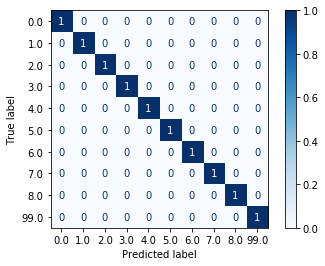

In [133]:
#Plotting confusion matrix, we apparently predicted all values in the validation set correctly.
##This part I am not so sure I did well.
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, classification_report
import matplotlib.pyplot as plt

plot_confusion_matrix(mod, X_val, y_val,
                                 cmap=plt.cm.Blues,
                                 normalize='pred');

In [130]:
confusion_matrix(y_val, mod.predict(X_val), normalize = 'true')

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

In [134]:
print(classification_report(y_val, mod.predict(X_val)))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       249
         1.0       1.00      1.00      1.00        77
         2.0       1.00      1.00      1.00        50
         3.0       1.00      1.00      1.00        38
         4.0       1.00      1.00      1.00        32
         5.0       1.00      1.00      1.00        27
         6.0       1.00      1.00      1.00        22
         7.0       1.00      1.00      1.00        20
         8.0       1.00      1.00      1.00        15
        99.0       1.00      1.00      1.00        10

    accuracy                           1.00       540
   macro avg       1.00      1.00      1.00       540
weighted avg       1.00      1.00      1.00       540



In [137]:
from pdpbox import pdp

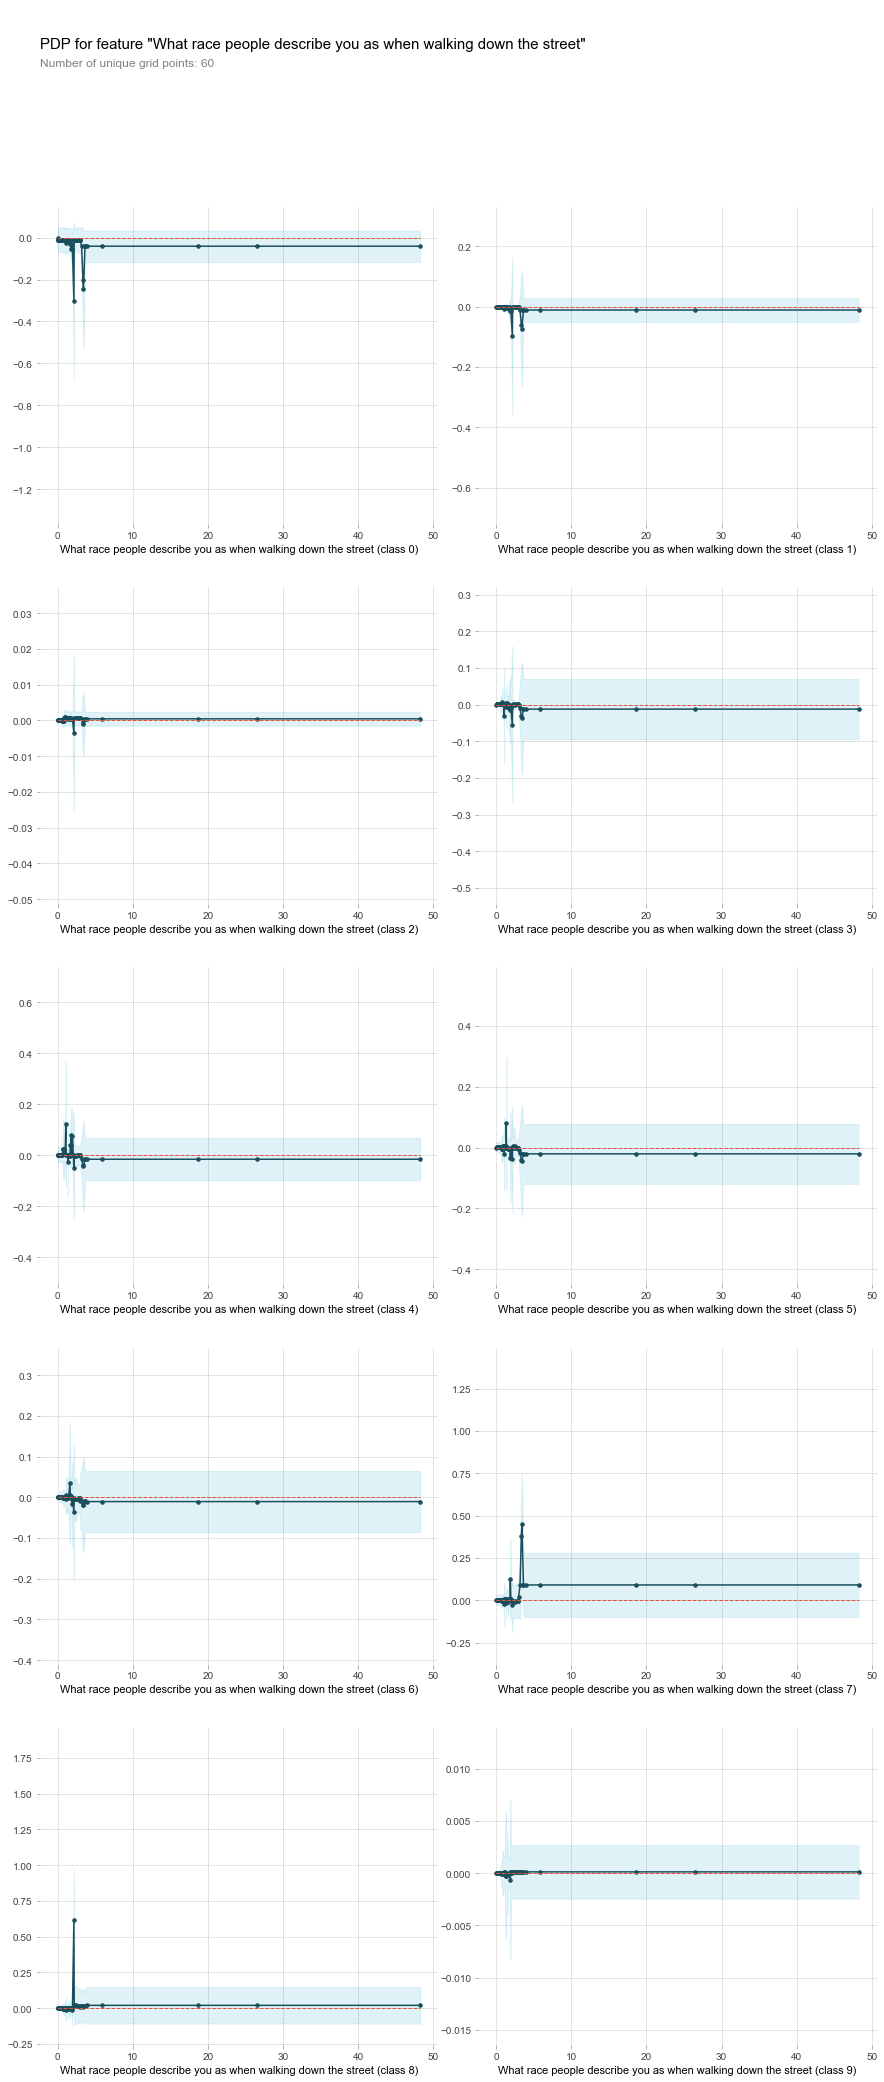

In [141]:
#Plotting the partial dependance of the main features in the model. 

pdp_street = pdp.pdp_isolate(
    model=mod, dataset=X_train, model_features=X_train.columns.tolist(), 
    feature='street_pct', cust_grid_points = X_train['street_pct'].tolist() 
)


fig, axes = pdp.pdp_plot(pdp_street, 'What race people describe you as when walking down the street')

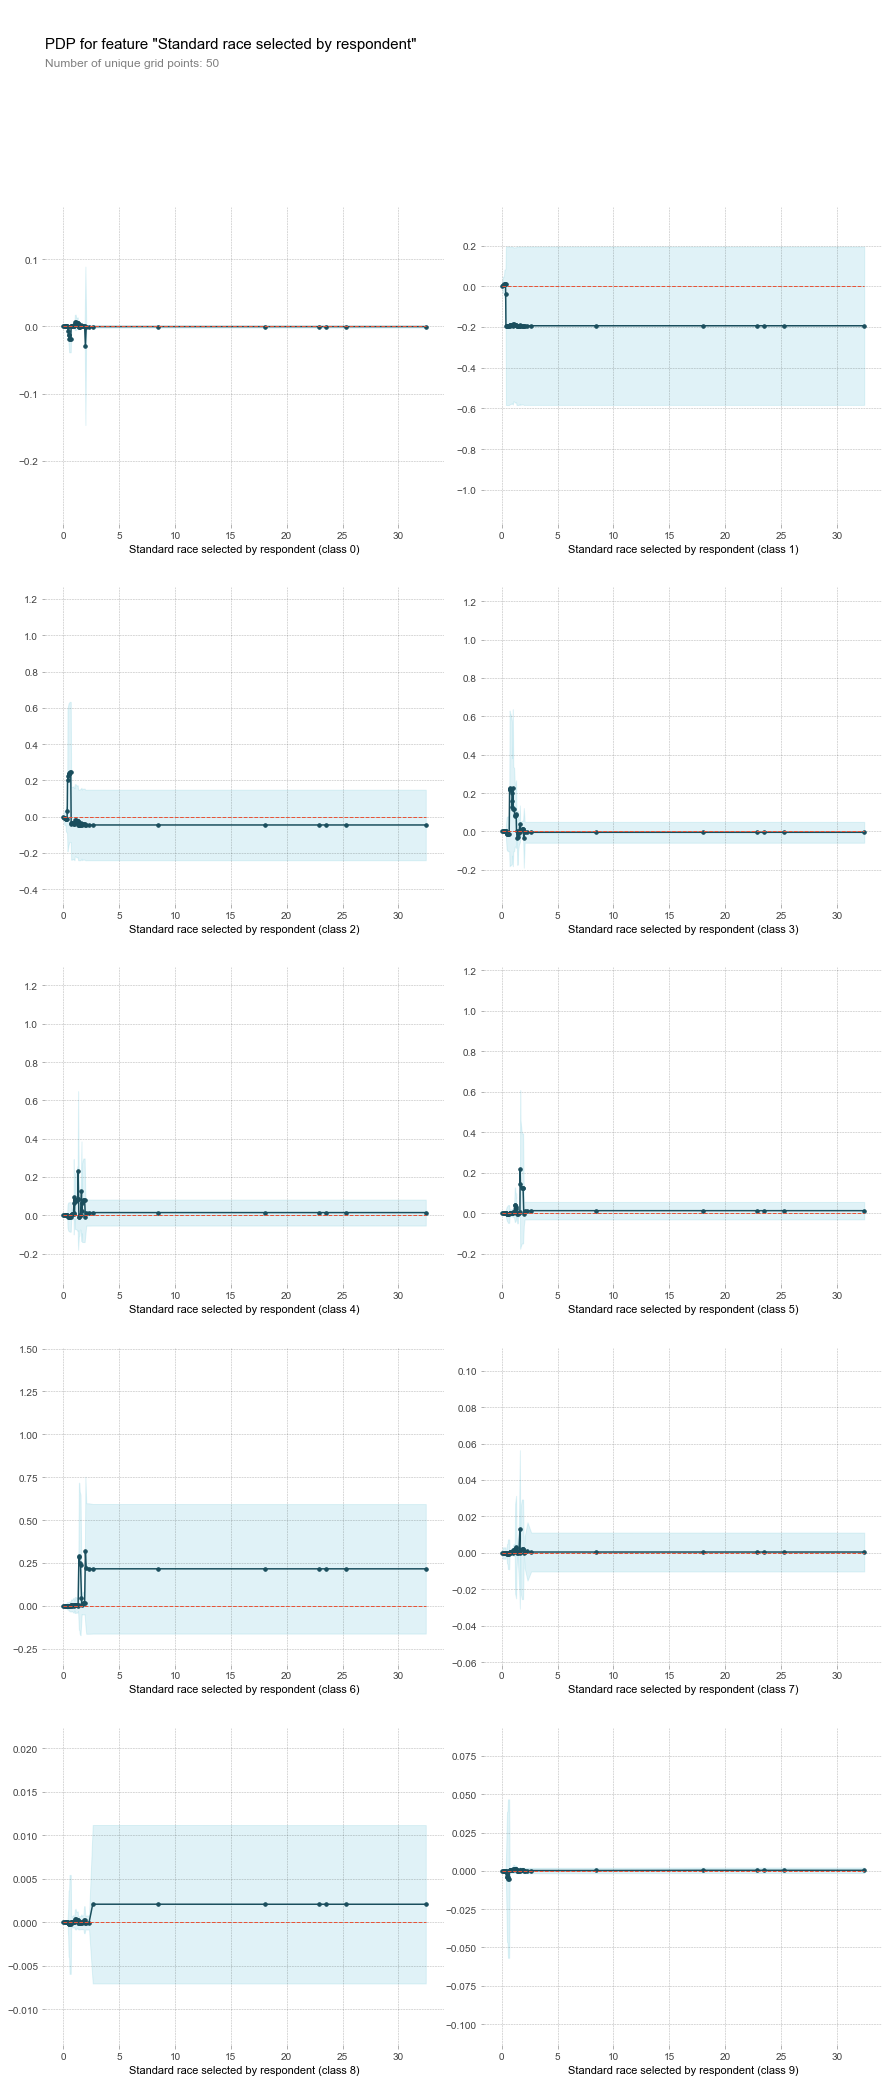

In [142]:
pdp_RACE = pdp.pdp_isolate(
    model=mod, dataset=X_train, model_features=X_train.columns.tolist(), 
    feature='race_pct', cust_grid_points = X_train['race_pct'].tolist() 
)


fig, axes = pdp.pdp_plot(pdp_RACE, 'Standard race selected by respondent')

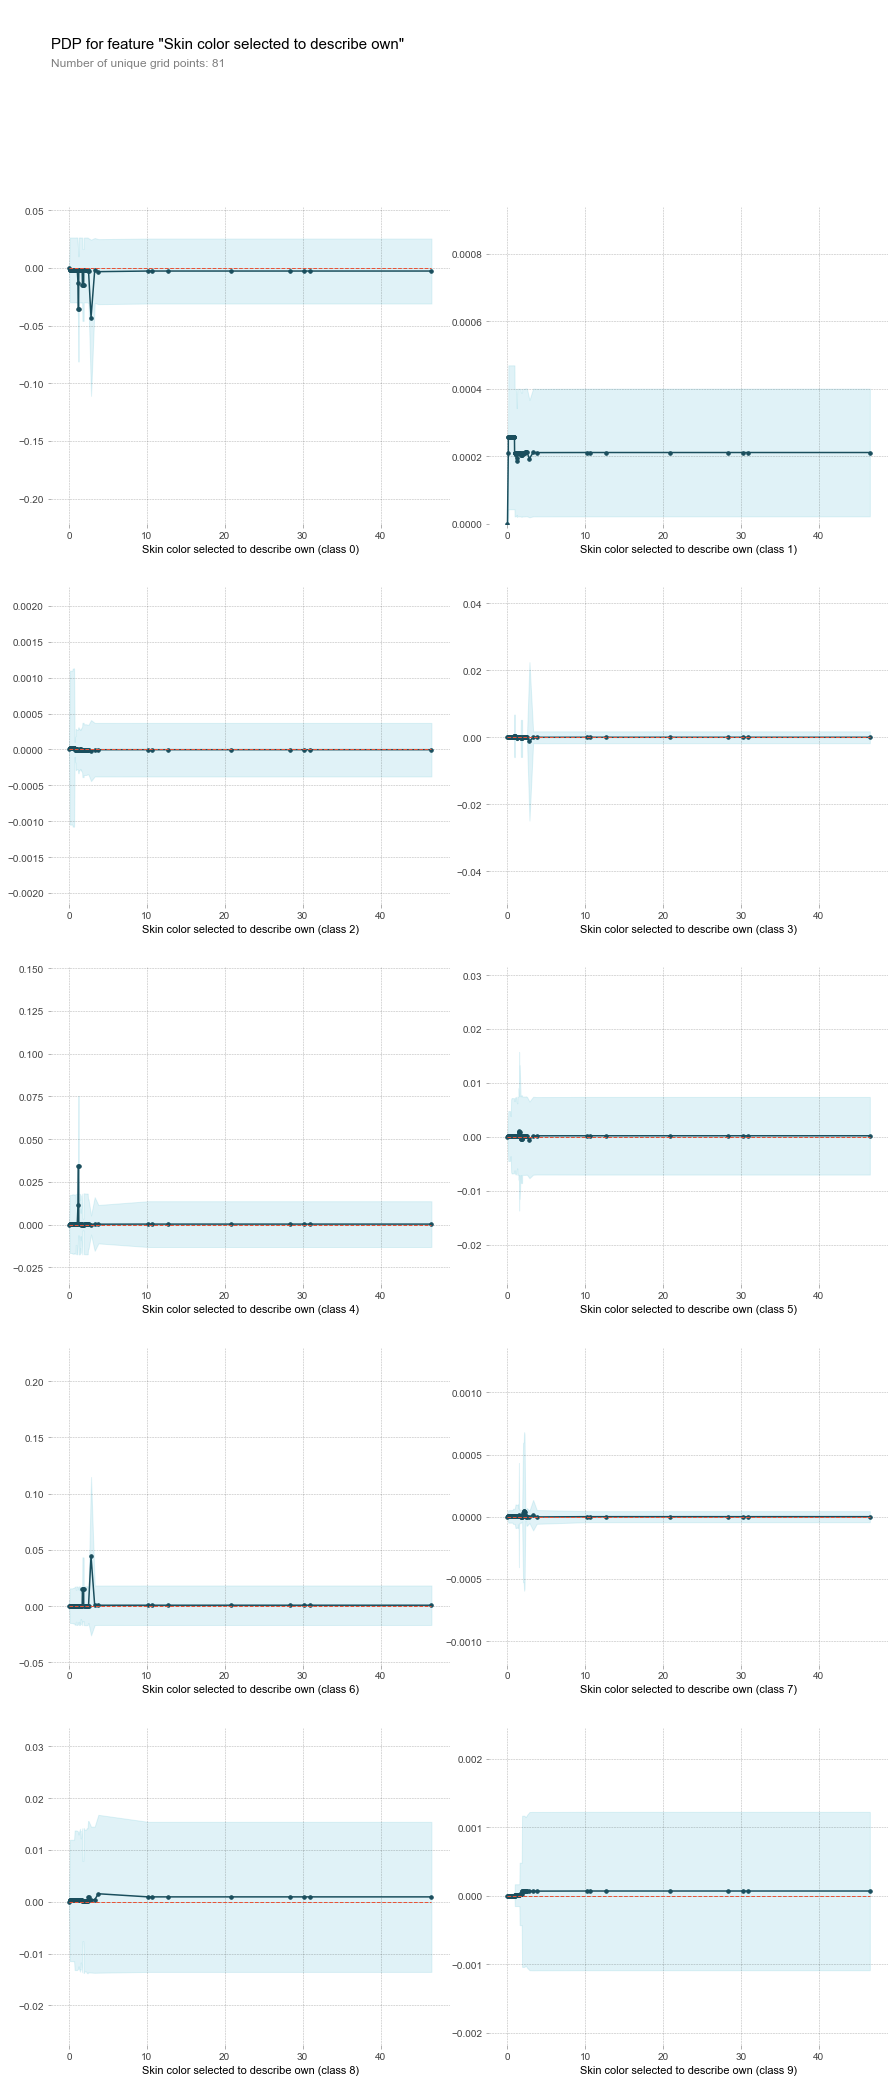

In [143]:
pdp_skin = pdp.pdp_isolate(
    model=mod, dataset=X_train, model_features=X_train.columns.tolist(), 
    feature='skin_pct', cust_grid_points = X_train['skin_pct'].tolist() 
)


fig, axes = pdp.pdp_plot(pdp_skin, 'Skin color selected to describe own')